In [76]:
#Importing all libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [77]:
#Loading the file having twitter API credentials
logs=pd.read_csv("Login.csv")

In [78]:
#Twitter API credentials
consumerKey=logs['Password'][0]
consumerSecret=logs['Password'][1]
accessToken=logs['Password'][2]
accessTokenSecret=logs['Password'][3]

In [79]:
#Create Authentication object
authenticate=tweepy.OAuthHandler(consumerKey,consumerSecret)

#set the accessToken and accessTokenSecret
authenticate.set_access_token(accessToken,accessTokenSecret)

#creating the API object while passing in the auth information
api=tweepy.API(authenticate,wait_on_rate_limit=True)

In [80]:
#Extract 100 tweets from the twitter user
posts=api.user_timeline(screen_name="realDonaldTrump",count=100,lang="en",tweet_mode="extended")

print("The five recent tweets are:")
i=1
for tweet in posts[0:5]:
    print(str(i)+".) "+tweet.full_text+"/n")
    i+=1

The five recent tweets are:
1.) RT @GeraldoRivera: Here’s #RussianBounty story in a nutshell:
1-US raid randomly discovers wad of cash in Afghan hut (How much? In a safe?…/n
2.) RT @TeamTrump: White House Press Secretary @KayleighMcEnany on President @realDonaldTrump’s Executive Order protecting monuments: “There wi…/n
3.) RT @TeamTrump: White House Press Secretary @KayleighMcEnany: President @realDonaldTrump stands against defunding our police, caving to mob…/n
4.) RT @TeamTrump: White House Press Secretary @KayleighMcEnany: There is no stronger advocate for our servicemen and women than President @rea…/n
5.) RT @WhiteHouse: "President @realDonaldTrump stands against defunding our great police officers, caving to mob rule, and cancel culture whic…/n


In [81]:
#Creating a datframe to store the tweets
df= pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweet'])

#Printing the top 5 rows of the dataframe
df.head()

,Tweet
0,RT @GeraldoRivera: Here’s #RussianBounty story...
1,RT @TeamTrump: White House Press Secretary @Ka...
2,RT @TeamTrump: White House Press Secretary @Ka...
3,RT @TeamTrump: White House Press Secretary @Ka...
4,"RT @WhiteHouse: ""President @realDonaldTrump st..."


In [82]:
#Writing a function to clean text

def cleantext(text):
    text=re.sub(r"@[A-Za-z0-9]+","",text) #Removes @mentions
    text=re.sub(r"#","",text)    #removes Hashtag symbols
    text=re.sub(r"RT[\s]+","",text) #removes the "RT" text 
    text=re.sub("https?:\/\/\S+","",text) #removes hyperlink
    
    return text

df["Tweet"]=df["Tweet"].apply(cleantext)

In [83]:
df.head()

,Tweet
0,: Here’s RussianBounty story in a nutshell:\n1...
1,: White House Press Secretary on President ’s...
2,: White House Press Secretary : President sta...
3,: White House Press Secretary : There is no st...
4,": ""President stands against defunding our gre..."


In [84]:
#Creare a function to get the subjectivity and polarity 
#Subjectivity tells us how opinionated the text is

def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity

def getpolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns for subjectivity and polarity

df['Subjectivity']=df['Tweet'].apply(getsubjectivity)
df['Polarity']=df['Tweet'].apply(getpolarity)

df.head()

,Tweet,Subjectivity,Polarity
0,: Here’s RussianBounty story in a nutshell:\n1...,0.35,-0.15
1,: White House Press Secretary on President ’s...,0.00,0.00
2,: White House Press Secretary : President sta...,0.00,0.00
3,: White House Press Secretary : There is no st...,0.00,0.00
4,": ""President stands against defunding our gre...",0.75,0.80


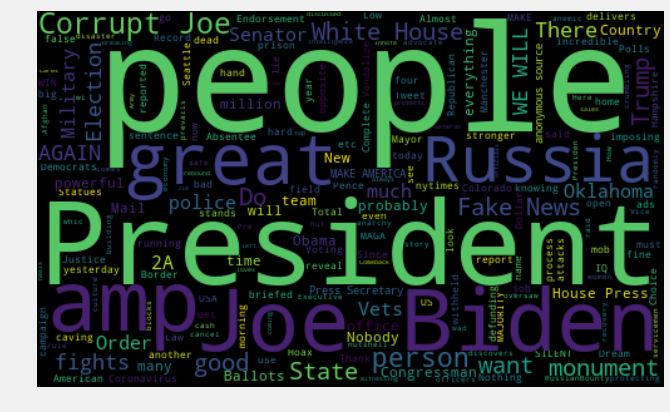

In [85]:
#Plot the Wordcloud
fig=plt.figure(figsize=(10,10))
allwords=' '.join([tweets for tweets in df['Tweet']])
wordcloud=WordCloud(width=500,height=300,random_state=42,max_font_size=119).generate(allwords)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [86]:
#Create a function to calculate the negative, neutral and positive analysis

def getanalysis(score):
    if score<0:
        return "Negative"
    elif score==0:
        return "Neutral"
    else:
        return "Positive"
    
df['Analysis']=df['Polarity'].apply(getanalysis)
df.head()

,Tweet,Subjectivity,Polarity,Analysis
0,: Here’s RussianBounty story in a nutshell:\n1...,0.35,-0.15,Negative
1,: White House Press Secretary on President ’s...,0.00,0.00,Neutral
2,: White House Press Secretary : President sta...,0.00,0.00,Neutral
3,: White House Press Secretary : There is no st...,0.00,0.00,Neutral
4,": ""President stands against defunding our gre...",0.75,0.80,Positive


In [87]:
#Print all of the positive reviews
sorteddf=df.sort_values(by=['Polarity'])
j=1
for i in range(0,len(df)):
    if df.Analysis[i]=='Positive':
        print(str(j)+".) "+df.Tweet[i])
        j+=1

1.) : "President  stands against defunding our great police officers, caving to mob rule, and cancel culture whic…
2.) : We are witnessing the Great American Comeback!
 
Record-breaking rebound in home sales, coming on the heels of a record…
3.) : I just left the White House where I was briefed by CoS  and top intelligence officials. They discussed …
4.) Senator  from Colorado is a GREAT Senator who always fights for the people of his state. He protects your 2A, loves our Vets and Military, and cares deeply about our BEAUTIFUL public lands. Cory has my Complete and Total Endorsement! COSEN 
5.) Congressman  is a great supporter of the MAGA Agenda! He fights for your 2A rights and the Border Wall. Scott is working hard for Colorado and has my Complete and Total Endorsement! CO03 
6.) : Congressman  is a Warrior for the people of Oklahoma! He proudly FIGHTS for our Border, Infrastructure…
7.) : Congressman Tom Cole is doing an incredible job for the people of Oklahoma! He delivers for ou

In [88]:
#Print all of the negative reviews
j=1
for i in range(0,len(df)):
    if df.Analysis[i]=='Negative':
        print(str(j)+".) "+df.Tweet[i])
        j+=1

1.) : Here’s RussianBounty story in a nutshell:
1-US raid randomly discovers wad of cash in Afghan hut (How much? In a safe?…
2.) : “Law and Order are the building blocks of the American Dream, but if anarchy prevails, this dream comes crumbling down!”

Pre…
3.) : Senator Jim Inhofe () delivers for the State of Oklahoma! A U.S. Army veteran, he fights hard for our…
4.) Seattle Looters, Agitators, Anarchists and “Protestors”, are now refusing to leave the “CHOP” Zone. They have ZERO respect for Government, or the Mayor of Seattle or Governor of Washington State! Not good!
5.) : Corrupt Joe Biden said yesterday that we have over “120 million” people dead of Coronavirus!
6.) : The Fake News @ nytimes must reveal its “anonymous” source. Bet they can’t do it, this “person” probably does not even…
7.) : Corrupt Joe Biden’s team is running false ads. Almost everything in them is a knowing lie, just the opposite of what t…
8.) Intel just reported to me that they did not find this info credible

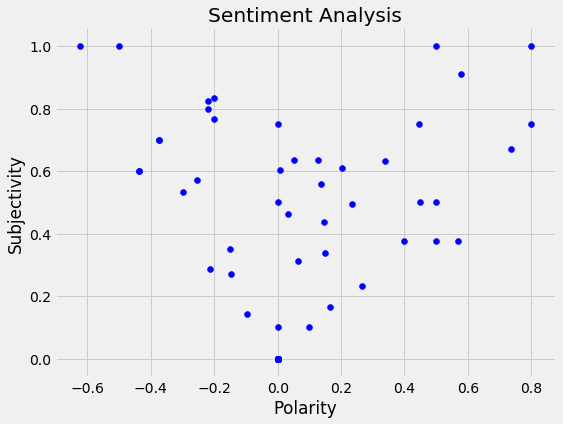

In [89]:
#Plot the polarity and subjectivity
plt.figure(figsize=(8,6))

plt.scatter(df['Polarity'],df['Subjectivity'],color='Blue')
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [106]:
#Get the percentage of positive tweets

ptweets=df[df.Analysis=="Positive"]

positive_percentage=(len(ptweets)/len(df))*100
print(str(positive_percentage)+" %")

25.0 %


In [105]:
#Get the percentage of negative tweets

ntweets=df[df.Analysis=="Negative"]

negative_percentage=len(ntweets)/len(df)
print(str(negative_percentage)+" %")

0.16 %


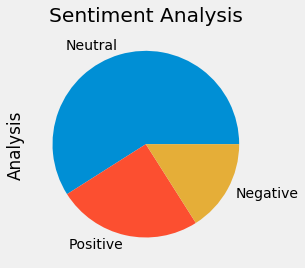

In [118]:
df['Analysis'].value_counts().plot.pie()
plt.title("Sentiment Analysis")
plt.show()